In [1]:
import matplotlib.pyplot as plt
import forex as fx
import json
import numpy as np
import gymnasium as gym
import ray
from ray.rllib.algorithms.ppo import PPOConfig
import random
from ray.tune.registry import register_env
import os


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
PYTHONWARNINGS="ignore::DeprecationWarning"

apiKey = None
accountID = None
with open("dev_settings.json", "r") as file:
    d = json.load(file)
    accountID = d["acckey"]
    apiKey = d["accid"]



class sol3_env(gym.Env):
    def __init__(self, config=None):
     
        self.history = fx.min("EUR_USD").to_numpy()[0][:,2]
        self.observation_space = gym.spaces.Box(0.0, 2.0, (32,), np.float64)
        self.action_space = gym.spaces.Discrete(2)
        self._s1 = None
        self._s2 = None
        self.c = 0
        self.iters = 1998
        self.total_reward = 0
        

    def reset(self, seed=None, options=None):
        r1 = random.randint(0,len(self.history) - 128)
        _state = self.history[r1: r1+64]
        self._s1 = _state[:32]
        self._s2 = _state[32:]
        self.c = 0

        # return np.array([1.0]), {}
        return self._s1, {"total_reward" : self.total_reward}

    def step(self, action):
        reward = 0
        terminated = False
        

        if action == 0:
            # buy 
            if self._s1[-1] < self._s2[-1]:
                reward = self._s2[-1] - self._s1[-1]
            else:
                reward = -(self._s2[-1] - self._s1[-1])
        if action == 1:
            
            if self._s1[-1] > self._s2[-1]:
                reward = self._s2[-1] - self._s1[-1]
            else:
                reward = -(self._s2[-1] - self._s1[-1])
            
        
        r1 = random.randint(0,len(self.history) - 128)
        _state = self.history[r1: r1+64]
        self._s1 = _state[:32]
        self._s2 = _state[32:]

        if self.c > self.iters:
            terminated = True

        self.c += 1
        self.total_reward += reward
        # Return next observation, reward, terminated, truncated, and info dict.
        return self._s1, reward, terminated, False, {"total_reward" : reward}
   



In [2]:
# Training


def env_creator(env_config):
    return sol3_env(env_config)
ray.init()
register_env("sol3", env_creator)

config = PPOConfig()

config.api_stack(enable_rl_module_and_learner=False,enable_env_runner_and_connector_v2=False)

config.environment("sol3")
config.env_runners(num_env_runners=1)
config.training(
    gamma=0.9, lr=0.01, train_batch_size_per_learner=256
)

# Build a Algorithm object from the config and run 1 training iteration.
algo = config.build_algo()

EPISODES = 5

reward_arr = []

res = algo.train()

for e in range(EPISODES):
    res = algo.train()





2025-02-21 12:12:11,607	INFO worker.py:1841 -- Started a local Ray instance.
c:\Users\excal\AppData\Local\Programs\Python\Python310\lib\site-packages\ray\rllib\algorithms\algorithm.py:574: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
c:\Users\excal\AppData\Local\Programs\Python\Python310\lib\site-packages\ray\tune\logger\unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
The `JsonLogger interface is deprecated in favor of the `ray.tune.json.JsonLoggerCallback` interface and will be removed in Ray 2.7.
  self._loggers.append(cls(self.config, self.logdir, self.trial))
c:\Users\excal\AppData\Local\Prog

(RolloutWorker pid=50652) YF.download() has changed argument auto_adjust default to True


2025-02-21 12:12:29,789	INFO trainable.py:161 -- Trainable.setup took 17.048 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2025-02-21 12:12:30,038	WARNING deprecation.py:50 -- DeprecationWarning: `ray.rllib.execution.train_ops.multi_gpu_train_one_step` has been deprecated. This will raise an error in the future!


TypeError: '_TrainingResult' object is not subscriptable

(RolloutWorker pid=44060) YF.download() has changed argument auto_adjust default to True


In [40]:
import ray.rllib
import ray.rllib.algorithms
import ray.rllib.algorithms.ppo


checkpoint_path = r"C:\Users\excal\Desktop\Github\FinancialGamble\Forex\oanda\models"
checkpoint_path = os.path.join(os.getcwd(),"models")

trainer_restored = ray.rllib.algorithms.ppo.PPO.from_checkpoint(checkpoint_path)

print("Model restored from checkpoint.")

c:\Users\excal\AppData\Local\Programs\Python\Python310\lib\site-packages\ray\rllib\algorithms\algorithm.py:574: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
c:\Users\excal\AppData\Local\Programs\Python\Python310\lib\site-packages\ray\tune\logger\unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
The `JsonLogger interface is deprecated in favor of the `ray.tune.json.JsonLoggerCallback` interface and will be removed in Ray 2.7.
  self._loggers.append(cls(self.config, self.logdir, self.trial))
c:\Users\excal\AppData\Local\Programs\Python\Python310\lib\site-packages\ray\tune\logger\unified.py:53: RayDep

(pid=44488) WARNING:tensorflow:From c:\Users\excal\AppData\Local\Programs\Python\Python310\lib\site-packages\ray\rllib\utils\framework.py:180: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.
(pid=44488) 
(pid=44488) WARNING:tensorflow:From c:\Users\excal\AppData\Local\Programs\Python\Python310\lib\site-packages\tf_keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.
(pid=44488) 
(pid=44488) WARNING:tensorflow:From c:\Users\excal\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_probability\python\internal\backend\numpy\_utils.py:48: The name tf.logging.TaskLevelStatusMessage is deprecated. Please use tf.compat.v1.logging.TaskLevelStatusMessage instead.
(pid=44488) 
(pid=44488) WARNING:tensorflow:From c:\Users\excal\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_probability\python\interna

(RolloutWorker pid=44488) YF.download() has changed argument auto_adjust default to True


Model restored from checkpoint.


In [37]:
# dum = np.zeros((1,32),dtype=np.float32)
# dum += 0.5
dum = fx.min("EUR_USD").to_numpy()[0][:,2][-32:].reshape(1,32)

policy = trainer_restored.get_policy()

policy.compute_actions(dum)

(array([0], dtype=int64),
 [],
 {'vf_preds': array([0.00388199], dtype=float32),
  'action_dist_inputs': array([[ 3.268858 , -3.2681391]], dtype=float32),
  'action_prob': array([0.99855316], dtype=float32),
  'action_logp': array([-0.00144792], dtype=float32)})

In [ ]:
class sol3_env(gym.Env):
    def __init__(self, config=None):
     
        self.history = fx.min("EUR_USD").to_numpy()[0][:,2]
        self.observation_space = gym.spaces.Box(0.0, 2.0, (32,), np.float64)
        self.action_space = gym.spaces.Discrete(2)
        r1 = random.randint(0,len(self.history) - 128)
        _state = self.history[r1: r1+64]
        self._s1 = _state[:32]
        self._s2 = _state[32:]
        self.c = 0
        self.iters = 1998
        self.total_reward = 0
        

    def reset(self, seed=None, options=None):
        r1 = random.randint(0,len(self.history) - 128)
        _state = self.history[r1: r1+64]
        self._s1 = _state[:32]
        self._s2 = _state[32:]
        self.c = 0

        # return np.array([1.0]), {}
        return self._s1, {"total_reward" : self.total_reward}

    def step(self, action):
        reward = 0
        terminated = False
        

        if action == 0:
            # buy 
            if self._s1[-1] < self._s2[-1]:
                reward = self._s2[-1] - self._s1[-1]
            else:
                reward = -(self._s2[-1] - self._s1[-1])
        if action == 1:
            
            if self._s1[-1] > self._s2[-1]:
                reward = self._s2[-1] - self._s1[-1]
            else:
                reward = -(self._s2[-1] - self._s1[-1])
            
        
        r1 = random.randint(0,len(self.history) - 128)
        _state = self.history[r1: r1+64]
        self._s1 = _state[:32]
        self._s2 = _state[32:]

        if self.c > self.iters:
            terminated = True

        self.c += 1
        self.total_reward += reward
        # Return next observation, reward, terminated, truncated, and info dict.
        return self._s1, reward, terminated, False, {"total_reward" : reward}




False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [55]:
checkpoint_path = os.path.join(os.getcwd(),"models")
trainer_restored = ray.rllib.algorithms.ppo.PPO.from_checkpoint(checkpoint_path)

policy = trainer_restored.get_policy()
data = fx.min("EUR_USD").to_numpy()[0][:,2][-128:]

c:\Users\excal\AppData\Local\Programs\Python\Python310\lib\site-packages\ray\rllib\algorithms\algorithm.py:574: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
c:\Users\excal\AppData\Local\Programs\Python\Python310\lib\site-packages\ray\tune\logger\unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
The `JsonLogger interface is deprecated in favor of the `ray.tune.json.JsonLoggerCallback` interface and will be removed in Ray 2.7.
  self._loggers.append(cls(self.config, self.logdir, self.trial))
c:\Users\excal\AppData\Local\Programs\Python\Python310\lib\site-packages\ray\tune\logger\unified.py:53: RayDep

(pid=49724) WARNING:tensorflow:From c:\Users\excal\AppData\Local\Programs\Python\Python310\lib\site-packages\ray\rllib\utils\framework.py:180: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.
(pid=49724) 
(pid=49724) WARNING:tensorflow:From c:\Users\excal\AppData\Local\Programs\Python\Python310\lib\site-packages\tf_keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.
(pid=49724) 
(pid=49724) WARNING:tensorflow:From c:\Users\excal\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_probability\python\internal\backend\numpy\_utils.py:48: The name tf.logging.TaskLevelStatusMessage is deprecated. Please use tf.compat.v1.logging.TaskLevelStatusMessage instead.
(pid=49724) 
(pid=49724) WARNING:tensorflow:From c:\Users\excal\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_probability\python\interna

(RolloutWorker pid=49724) YF.download() has changed argument auto_adjust default to True


In [51]:
policy.compute_actions(data.reshape(1,32))

(array([0], dtype=int64),
 [],
 {'vf_preds': array([-0.0272819], dtype=float32),
  'action_dist_inputs': array([[  9.649422, -10.145331]], dtype=float32),
  'action_prob': array([1.], dtype=float32),
  'action_logp': array([0.], dtype=float32)})

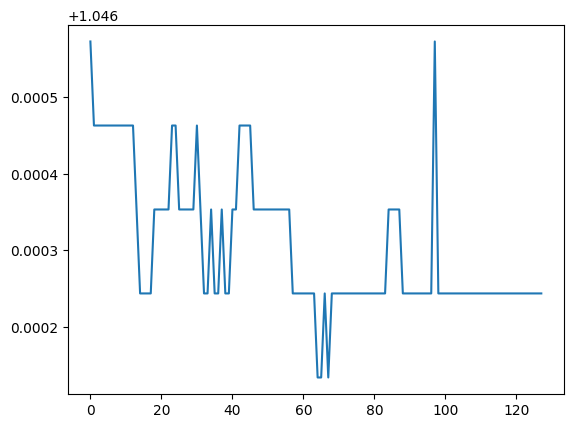

In [58]:

plt.plot(data)